# **<h1><center><font color = 'redd'>Automatic Image Caption Generator</h1></font>**

- Abhishek Chaudhary 

- DSAI, IIIT - NAYA RAIPUR

# **Chapter 1: Developing a Simple Photo Classifier using a pre-trained model**

We use the VGG16 class (CNN model of 16 layers released by VGG) provided by keras. This model contains the pre-trained weights released by the Oxford group and we will be using it directly for the classification of a new image. 

We first load the model i.e, VGG16 class and after it is loaded it is time to load our sample or test image which in this case is a "coffee mug" downloaded from the internet. Now, we prepare the image for the network by forst resizing it to 224*224 pixels using `load_img()` and then conerting the pixels into a NumPy array. Since the network expects a 4-D array and we have only one image, we reshape it using `reshape()` and add the extrta dimensions. Next, the data is prepared for input by using `preprocess_input()`. This is done in order to prepare the image in same manner as the ImageNet data was prepared.

Finally, the prediction is made which can be further decoded into the top 3 object classes it was predicted amongst the 1000 known object types.<font color = 'red'>**Note**: Here only the major class is printed</font> 

Majorly, the above boils down to 3 main steps: 

1. Load the VGG16 model
2. Load and prepare the sample/test image
3. Classify the object class 

In [ ]:
# importing drive 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
 import os
 os.chdir('/content/drive/MyDrive/NLP')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [ ]:
# load the model
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

As we can see the model is pretty big as mentioned in the text book. 

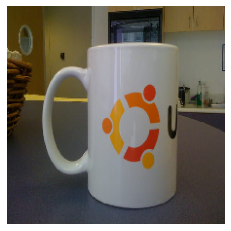

In [ ]:
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
plt.axis('off')
plt.imshow(image)
plt.show()


In [ ]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
# convert the probabilities to class labels
label = decode_predictions(yhat)

In [ ]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (70.11%)


As we can see that the network predicts that the prob. of "Coffee Mug"(object) in the sample image is 70%. Thus, this the ouptut which we were anticipating. 

# **Chapter 2: Evaluating the Generated Text With the BLEU Score**

BLEU stands for ***Bilingual Evaluation Understudy Score*** which is a metric for evaluating or analyzing the *generated sentence* to a *reference sentence*.

The range for this metric is from 0 - 1. The perfect match is 1 and perfect mismatch is 0 obviously. This BLEU score is based on counting the n-grams of both the generated and reference independent of the occurence order in either class. This was later modified to take into account the occurance of words in the generated sentence, this is called as the **modified n-gram precision** in the paper it was forst proposed. This can be used in various language generation problems which includes **Image Caption Generation** which is the ultimate goal of this lab. 

We use the `sentecnce_bleu()` function provided by the NLTK for this BLEU score. The reference needs to be a list of sentences where each senetence is a list of tokens. The candidate statement is also given as a list of tokens. We can also perform this BLEU calculation for multiple sentences (paragraph) using `corpus_bleu()` function. 

There are mainly two types of BLEU scores :-

1. Individual n-gram score
2. Cumulative n-gram score  

    Sentence BLEU Score

  Here we first calculate the score for one candidate statement for which two references are given.    

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'a', 'test'], ['this', 'is' 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate)
print(score)

1.0


The score is a perfect match as one can easily see that the candidate was from one of the reference sentences.

## **Corpus BLEU Score**

Here we try the similar thing but the difference here is that we are doing this for a document. The rules remain similar here as well with minor changes. The reference will now be list of documents where each document is a reference and alternative doc is a list of tokens. The candidate doc here is a list of lists of tokens. 

In [ ]:
# two references for one document
from nltk.translate.bleu_score import corpus_bleu
references = [[['this', 'is', 'a', 'test'], ['this', 'is' 'test']]]
candidates = [['this', 'is', 'a', 'test']]
score = corpus_bleu(references, candidates)
print(score)

1.0


This is again the perfect score for the candidate matches one reference document exactly.

## **Individual n-gram Scores**

As the name suggests this a score for specific gram orders (1-gram, 2-gram, etc). For the BLEU scores of different gram orders we can specify the weight of at that index and 0 for rest indices in a tuple where each index is a gram order.

Like for 1-gram we do as done below:

In [ ]:
# 1-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
print(score)

0.75


C:\Users\prabh\miniconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\prabh\miniconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


The score we get for individual token or gram is 0.75 where we actualy had a difference of 1 word in the reference and candidate sentence i.e, **"small"** and **"a"**.

Similarly, for 2, 3 and 4 grams we can use the same method as mentioned above. 

In [ ]:
# n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'a', 'test']]
candidate = ['this', 'is', 'a', 'test']
# for 1-gram
print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
# for 2-gram
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
# for 3-gram 
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
# for 4-gram
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

Individual 1-gram: 1.000000
Individual 2-gram: 1.000000
Individual 3-gram: 1.000000
Individual 4-gram: 1.000000


We can see that we get the perfect score for all the grams, this is because we have the exact same candidate and reference sentences.

## **Cumulative n-gram Score**

The name clearly suggests, here the score for a cumulation of individual n-grams at all order of 1-n and weighing them by calculating geometric mean. By default the `sentence_bleu()` calculates BLEU-4 (cumulative for 4-gram) where the weight is 0.25 for each 1, 2, 3 and 4 grams. 

In [ ]:
# 4-gram cumulative BLEU
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0, 0))
print(score)

0.7071067811865475


We can perform this for BLEU-1, BLEU-2, BLEU-3 and BLEU-4. We just need to give the geometric means as the weight e.g, (0.5, 0.5) for bigram to each 1 and 2 gram, (0.33, 0.33, 0.33) for 3-gram to each 1, 2 and 3 gram and 0.25 for 4-gram to each 1, 2, 3 and 4 grams.

In [ ]:
# cumulative BLEU scores
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0, 0)))

Cumulative 1-gram: 0.750000
Cumulative 2-gram: 0.500000
Cumulative 3-gram: 0.632878
Cumulative 4-gram: 0.707107


## **Worked example**

In this example, our pure goal is try to test different test cases of scores caused due to changes in the candidate sentence. Starting with the perfect score.

In [ ]:
# prefect match
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']
score = sentence_bleu(reference, candidate)
print(score)

1.0


 Let’s change one word, ‘quick’ to ‘fast’

In [ ]:
# one word different
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'fast', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']
score = sentence_bleu(reference, candidate)
print(score)

0.7506238537503395


Changing two words, both ‘quick’ to ‘fast’ and ‘lazy’ to ‘sleepy’

In [ ]:
# two words different
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'fast', 'brown', 'fox', 'jumped', 'over', 'the', 'sleepy', 'dog']
score = sentence_bleu(reference, candidate)
print(score)

0.4854917717073234


Now what happens if all words are different ? The obvious answer is a perfect mismatch. 

In [ ]:
# all words different
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
score = sentence_bleu(reference, candidate)
print(score)

0


Dropping the last two words but all the remaining words are same

In [ ]:
# shorter candidate
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the']
score = sentence_bleu(reference, candidate)
print(score)

0.7514772930752859


Adding two words to the candidate but all the remaining words are same

In [ ]:
# longer candidate
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog',
'from', 'space']
score = sentence_bleu(reference, candidate)
print(score)

0.7860753021519787


Very short candidate

In [ ]:
# very short
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick']
score = sentence_bleu(reference, candidate)
print(score)

4.5044474950870215e-156


# **Chapter 3: Preparing Photo Caption Dataset For Modeling**

## **Loading the Photos**

We are using the Flickr8K dataset and it has around 8k images which depicts different scenarios and situations. The images are given a unique identifier name for easy identification process. Now, to be able to use this we first need to read them as array of pixels and then convert them to NumPy arrays for to be able to use the Keras.

Since, we are using the pre-trained VGG16 model, we need ti resize and do all the image preparation we did back in chapter 1. Finally, we must be able to retrieve back the original identifier for each image as well thus we need to separate each identifier somehow. For this we use the '.'(period) charatcer. 

We finally use all of this to be able to make a function that will return a keyed dictionary (each image to its identifier) after loading and pre-processing the images from the dataset.

In [ ]:
from os import listdir
from os import path
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
def load_photos(directory):
    images = dict()
    for name in listdir(directory):
    # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # image = image.reshape((1, 224*224*3))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get image id
        image_id = name.split('.')[0]
        images[image_id] = image
    return images

In [ ]:
# load images
directory = 'Flicker8k_Dataset'
images = load_photos(directory)
print('Loaded Images: %d' % len(images))

Loaded Images: 8091


Thus we get our total no. of loaded images.

## **Pre-Calculate Photo Features**

Now to be able to generate some description of the images fed to the netwrok, the network needs to learn the features of the image. We can use the pre-trained VGG-16 model for this purpose. This model gives the object class of the image object correct ? 

So if we could just remove the unwanted part (output layer) from the network we can get what we desire right now i.e, the features !! 

So we remove the two dense output layers from the network using `include_top=False`. Therefore, now we have the features of the images as the output from the network. 

All these features are extracted and then stored in a single file called **features.pkl** which would later be used in training the language model.

In [ ]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input

In [ ]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    in_layer = Input(shape=(224, 224, 3))
    model = VGG16(include_top=False, input_tensor=in_layer)
    model.summary()
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

In [ ]:
# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
>3146355833_1b7fc80210.jpg
>3150742439_b8a352e1e0.jpg
>3139389284_f01bd4c236.jpg
>3148571800_c5515e6c3d.jpg
>3130970054_04a3865c43.jpg
>3132760860_3e743a935d.jpg
>3150380412_7021e5444a.jpg
>3131160589_dc73c209b7.jpg
>3123526484_02952e40fc.jpg
>3137061312_eb5fdcf3fd.jpg
>3119913014_688d4997d7.jpg
>3132619510_7dfc947d25.jpg
>3123351642_3794f2f601.jpg
>3139118874_599b30b116.jpg
>3113322995_13781860f2.jpg
>3143953179_1c08c023a5.jpg
>3141613533_595723208d.jpg
>3132903412_b4780d0ccf.jpg
>3136674757_57406c305c.jpg
>3130064588_6d1d3fa2dd.jpg
>3134585858_a8c3493ca5.jpg
>3125041578_c1f2d73b6d.jpg
>3134586018_ae03ba20a0.jpg
>3139837262_fe5ee7ccd9.jpg
>3116731299_6139b25c18.jpg
>3122497129_d08f5729b8.jpg
>3116985493_04b1dc3345.jpg
>3126773489_7ae425af17.jpg
>3132832452_c354c6396c.jpg
>3120648767_812c72eabe.jpg
>3122888809_9ae9b4b9b2.jpg
>3136043366_b3f8607a0e.jpg
>3126981064_1e803c3d7f.jpg
>3148811252_2fa9490a04.jpg
>3134387321_3a253224c1.jpg
>314

## **Loading and Preparing the Descriptions**

Now with the photo loading and feature extraction is dealt with. I think it is time to deal with another important part called as the description of each of these image. The ***Flickr8K.token.txt*** file contains the image descriptions against their respective image identifiers. 

For the **Description loading** procedure, we need to do the following steps:

1. Decide which annotation or description to use (We used the first one for simplicity sake)
2. Load the entire annotation file 
3. Split the samples into the ***identifier*** and ***description*** part (*this can be done using the trick of a **"white space"** as the identifier and description have a white space between them*)
4. Perform some cleaning  

For the **Description Preparation** procedure, we need to perform some further cleaning. This includes:

1. Case Normalization (lowercase here)
2. Punctuation removal 
3. Remove tokens with one or fewer characters.

Finally, we save all this cleaned data into one file for later use.

In [ ]:
import string
import re

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
            # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # store the first description for each image
        if image_id not in mapping:
            mapping[image_id] = image_desc
    return mapping

In [ ]:
# clean description text
def clean_descriptions(descriptions):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    for key, desc in descriptions.items():
        # tokenize
        desc = desc.split()
        # convert to lower case
        desc = [word.lower() for word in desc]
        # remove punctuation from each word
        desc = [re_punc.sub('', w) for w in desc]
        # remove hanging 's' and 'a'
        desc = [word for word in desc if len(word)>1]
        # store as string
        descriptions[key] = ' '.join(desc)

In [ ]:
# save descriptions to file, one per line
def save_doc(descriptions, filename):
    lines = list()
    for key, desc in descriptions.items():
        lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
filename = 'Flickr8k_text/Flickr8k.token.txt'
doc = load_doc(filename)
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [ ]:
clean_descriptions(descriptions)
# summarize vocabulary
all_tokens = ' '.join(descriptions.values()).split()
vocabulary = set(all_tokens)
print('Vocabulary Size: %d' % len(vocabulary))
# save descriptions
save_doc(descriptions, 'descriptions.txt')

Vocabulary Size: 4484


The vocabulary is quite big, this is a point not to be ignored. 

## **Whole Description Sequence Model**

We will be working on a naive model for the caption generation which would output the complete textual description in one-shot. This would mean that the model would interpret, generate the words and then arrange those words in order to make a meaningful description. Here we shall use the encoding of an image to generate the output sentence which is a bit different from the "language translation" encoding-decoding we did in previous labs.

For this we would be doing the following steps:

1. Mapping image identifiers to clean descriptions 
2. Extarct the description text for encoding 
3. Encode the image descriptions into integer sequences (converting pixel/image to numbers)
4. Padding all encoded sequences with 0 to one length (the length of max enoded sequence)
5. One hot encode all the padded sequence  

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
# load clean descriptions into memory
def load_clean_descriptions(filename):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # store
        descriptions[image_id] = ' '.join(image_desc)
    return descriptions

In [ ]:
descriptions = load_clean_descriptions('descriptions.txt')
print('Loaded %d' % (len(descriptions)))

Loaded 8092


In [ ]:
# extract all text
desc_text = list(descriptions.values())
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(desc_text)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 4485


In [ ]:
# integer encode descriptions
sequences = tokenizer.texts_to_sequences(desc_text)
# pad all sequences to a fixed length
max_length = max(len(s) for s in sequences)
print('Description Length: %d' % max_length)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

Description Length: 28


In [ ]:
# one hot encode
y = to_categorical(padded, num_classes=vocab_size)
y = y.reshape((len(descriptions), max_length, vocab_size))
print(y.shape)

(8092, 28, 4485)


Here we can see that we have a total of 4092 images loaded, 28 words is the one fixed length or the length of the longest encoded description and finally 4485 total vocabulary words. 

## **Word-By-Word Model**

One technique for producing captions for photos is to produce one word given both the image and the last word as input. To create each word in the description, the model must be invoked recursively using the previous predictions as input.

The model will accept a whole sequence of words as input, with the length of the sequence equal to the maximum length of descriptions in the dataset.

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
# load clean descriptions into memory
def load_clean_descriptions(filename):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # store
        descriptions[image_id] = ' '.join(image_desc)
    return descriptions

In [ ]:
descriptions = load_clean_descriptions('descriptions.txt')
print('Loaded %d' % (len(descriptions)))

Loaded 8092


In [ ]:
# extract all text
desc_text = list(descriptions.values())
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(desc_text)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 4485


In [ ]:
# integer encode descriptions
sequences = tokenizer.texts_to_sequences(desc_text)
# determine the maximum sequence length
max_length = max(len(s) for s in sequences)
print('Description Length: %d' % max_length)

Description Length: 28


In [ ]:
X, y = list(), list()
for img_no, seq in enumerate(sequences):
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
        # split into input and output pair
        in_seq, out_seq = seq[:i], seq[i]
        # pad input sequence
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        # encode output sequence
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        # store
        X.append(in_seq)
        y.append(out_seq)

In [ ]:
# convert to numpy arrays
X, y = array(X), array(y)
print(X.shape)
print(y.shape)

(66456, 28)
(66456, 4485)


## **Progressive Loading**

The Flickr8K dataset is a huge dataset, but it can still fit into the RAM (min of 8 GB is required) of my system. This is when we're talking about fitting the model on CPU. For GPU it is not possible. Thus, to tackle this issue we can progressively load the photo and description as when needed by the model. We'll be dping this with the help of Keras function `fit_generator()`. This will return the batches of samples which would then be used by the model for training purpose.  

In [ ]:
from os import listdir
from os import path
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
# load clean descriptions into memory
def load_clean_descriptions(filename):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # store
        descriptions[image_id] = ' '.join(image_desc)
    return descriptions

In [ ]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = list(descriptions.values())
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer


In [ ]:
# load a single photo intended as input for the VGG feature extractor model
def load_photo(filename):
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a NumPy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)[0]
    # get image id
    image_id = filename.split('/')[-1].split('.')[0]
    return image, image_id

In [ ]:
def create_sequences(tokenizer, max_length, desc, image):
    Ximages, XSeq, y = list(), list(),list()
    vocab_size = len(tokenizer.word_index) + 1
    # integer encode the description
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
        # select
        in_seq, out_seq = seq[:i], seq[i]
        # pad input sequence
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        # encode output sequence
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        # store
        Ximages.append(image)
        XSeq.append(in_seq)
        y.append(out_seq)
    Ximages, XSeq, y = array(Ximages), array(XSeq), array(y)
    return [Ximages, XSeq, y]


In [ ]:
def data_generator(mapping, tokenizer, max_length):
    # loop for ever over images
    directory = 'Flicker8k_Dataset'
    while 1:
        for name in listdir(directory):
            # load an image from file
            filename = directory + '/' + name
            image, image_id = load_photo(filename)
            # create word sequences
            desc = mapping[image_id]
            in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc, image)
            yield [[in_img, in_seq], out_word]

In [ ]:
# load mapping of ids to descriptions
descriptions = load_clean_descriptions('descriptions.txt')
# integer encode sequences of words
tokenizer = create_tokenizer(descriptions)
# pad to fixed length
max_length = max(len(s.split()) for s in list(descriptions.values()))
print('Description Length: %d' % max_length)

Description Length: 28


In [ ]:
# test the data generator
generator = data_generator(descriptions, tokenizer, max_length)
inputs, outputs = next(generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

(4, 224, 224, 3)
(4, 28)
(4, 4485)


# **Chapter 4: Project - Developing a Neural Image Caption Generation Model**

Okay, Now it is time for the final Showdown !!

Whatever we have done till now in the above chapters is all going to be used in this final chapter. In a nutshell, the steps that are going to be followed are as follows:

1. Photo and Caption Dataset (Flickr8K dataset)
2. Prepare Photo Data 
3. Prepare text Data 
4. Develop DL Model (Data Loading, Model Definition, Model Fitting)
5. Evaluate the Model
6. Generate Captions (testing the model)

In [ ]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [ ]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    model.summary()
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

In [ ]:
# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
>3146355833_1b7fc80210.jpg
>3150742439_b8a352e1e0.jpg
>3139389284_f01bd4c236.jpg
>3148571800_c5515e6c3d.jpg
>3130970054_04a3865c43.jpg
>3132760860_3e743a935d.jpg
>3150380412_7021e5444a.jpg
>3131160589_dc73c209b7.jpg
>3123526484_02952e40fc.jpg
>3137061312_eb5fdcf3fd.jpg
>3119913014_688d4997d7.jpg
>3132619510_7dfc947d25.jpg
>3123351642_3794f2f601.jpg
>3139118874_599b30b116.jpg
>3113322995_13781860f2.jpg
>3143953179_1c08c023a5.jpg
>3141613533_595723208d.jpg
>3132903412_b4780d0ccf.jpg
>3136674757_57406c305c.jpg
>3130064588_6d1d3fa2dd.jpg
>3134585858_a8c3493ca5.jpg
>3125041578_c1f2d73b6d.jpg
>3134586018_ae03ba20a0.jpg
>3139837262_fe5ee7ccd9.jpg
>3116731299_6139b25c18.jpg
>3122497129_d08f5729b8.jpg
>3116985493_04b1dc3345.jpg
>3126773489_7ae425af17.jpg
>3132832452_c354c6396c.jpg
>3120648767_812c72eabe.jpg
>3122888809_9ae9b4b9b2.jpg
>3136043366_b3f8607a0e.jpg
>3126981064_1e803c3d7f.jpg
>3148811252_2fa9490a04.jpg
>3134387321_3a253224c1.jpg
>314

In [ ]:
import string
import re

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping


In [ ]:
def clean_descriptions(descriptions):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    for _, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [re_punc.sub('', w) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] = ' '.join(desc)

In [ ]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

In [ ]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
filename = 'Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


In [ ]:
from pickle import load

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

In [ ]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

In [ ]:
# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

In [ ]:
# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


In [ ]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [ ]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [ ]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [ ]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
    X1, X2, y = list(), list(), list()
    # walk through each image identifier
    for key, desc_list in descriptions.items():
        # walk through each description for the image
        for desc in desc_list:
            # encode the sequence
            seq = tokenizer.texts_to_sequences([desc])[0]
            # split one sequence into multiple X,y pairs
            for i in range(1, len(seq)):
                # split into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # encode output sequence
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                # store
                X1.append(photos[key][0])
                X2.append(in_seq)
                y.append(out_seq)
    return array(X1), array(X2), array(y)

In [ ]:
# define the captioning model
def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(1000, ))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7579


In [ ]:
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


In [ ]:
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)
# load test set
filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))

Dataset: 1000


In [ ]:
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))

Descriptions: test=1000


In [ ]:
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

Photos: test=1000


In [ ]:
# define the model
model = define_model(vocab_size, max_length)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 256)      1940224     ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1000)         0           ['input_1[0][0]']                
                                                                                              

In [ ]:
# define checkpoint callback
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest), use_multiprocessing = True)

Epoch 1/20
9576/9576 [==============================] - ETA: 0s - loss: 4.5093
Epoch 1: val_loss improved from inf to 4.03251, saving model to model.h5
9576/9576 [==============================] - 1672s 174ms/step - loss: 4.5093 - val_loss: 4.0325
Epoch 2/20
9576/9576 [==============================] - ETA: 0s - loss: 3.8206
Epoch 2: val_loss improved from 4.03251 to 3.84409, saving model to model.h5
9576/9576 [==============================] - 1619s 169ms/step - loss: 3.8206 - val_loss: 3.8441
Epoch 3/20
9576/9576 [==============================] - ETA: 0s - loss: 3.5591
Epoch 3: val_loss improved from 3.84409 to 3.78219, saving model to model.h5
9576/9576 [==============================] - 1688s 176ms/step - loss: 3.5591 - val_loss: 3.7822
Epoch 4/20
9576/9576 [==============================] - ETA: 0s - loss: 3.4097
Epoch 4: val_loss improved from 3.78219 to 3.77848, saving model to model.h5
9576/9576 [==============================] - 1757s 184ms/step - loss: 3.4097 - val_loss: 3.7

## **Evaluate the model**

In [1]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

In [2]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [3]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)


In [4]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

In [5]:
# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

In [6]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [7]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [8]:
# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [9]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [10]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for _ in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [11]:
# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
    # remove start of sequence token
    index = summary.find('startseq ')
    if index > -1:
        summary = summary[len('startseq '):]
    # remove end of sequence token
    index = summary.find(' endseq')
    if index > -1:
        summary = summary[:index]
    return summary

In [12]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # clean up prediction
        yhat = cleanup_summary(yhat)
        # store actual and predicted
        references = [cleanup_summary(d).split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0, 0)))


In [13]:
# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [14]:
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [15]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7579


In [16]:
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


In [17]:
# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))

Dataset: 1000


In [18]:
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))

Descriptions: test=1000


In [24]:
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

Photos: test=1000


In [22]:
# load the model
filename = 'model.h5'
model = load_model(filename)

In [25]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.414134
BLEU-2: 0.227171
BLEU-3: 0.410972
BLEU-4: 0.476625


## **Generate new caption**

In [26]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

In [27]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [28]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

In [29]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
        # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

In [30]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [31]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [32]:
# load training dataset
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [33]:
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [34]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

## **Generating the caption**

In [35]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

In [36]:
# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

In [37]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [38]:
# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
    # remove start of sequence token
    index = summary.find('startseq ')
    if index > -1:
        summary = summary[len('startseq '):]
    # remove end of sequence token
    index = summary.find(' endseq')
    if index > -1:
        summary = summary[:index]
    return summary

In [39]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for _ in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [41]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model.h5')

In [42]:
import matplotlib.pyplot as plt

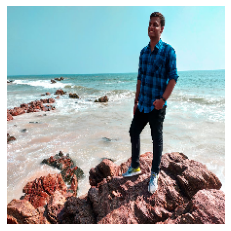

man in blue shorts is standing on the beach


In [44]:
# load and prepare the photograph
photo = extract_features('/content/drive/MyDrive/mypic1.jpg')
# load an image from file
image = load_img('/content/drive/MyDrive/mypic1.jpg', target_size=(224, 224))
plt.axis('off')
plt.imshow(image)
plt.show()

# generate description
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

Well I must say the caption is very accurate. I am impressed.